# K-Means


### Data Description

The file Mall_Customers.csv is provided, containing the following data on supermarket chain customers:
- CustomerID — Customer identifier.
- Genre – Customer gender.
- Age – Customer age.
- Annual Income (k\$) – Customer’s annual income in thousand dollars.
- Spending Score (1–100) – Customer rating, target variable.

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans

### 1

Load the dataset and perform exploratory data analysis. Draw conclusions about the identified patterns, characteristics, and other properties found in the data.

In [9]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### 2

The k-means method requires specifying the number of clusters the data will be divided into. Since the dataset can be large enough that training a single model may take several hours, it is important to roughly estimate the number of clusters before starting the model training.


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

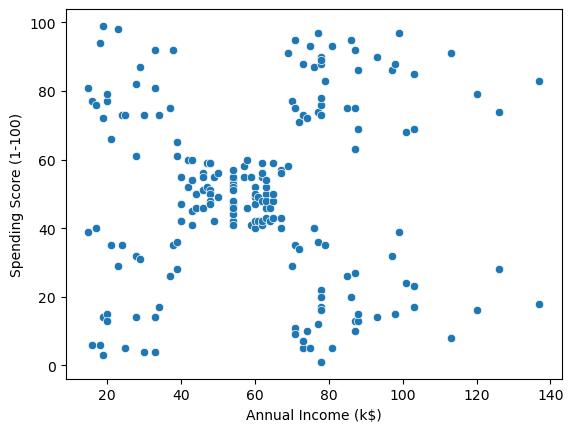

In [10]:
sns.scatterplot(x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'])

### 3

Convert the categorical feature Genre into a numerical one.

In [11]:
ohe = OneHotEncoder(sparse_output=False)
ohe_data = ohe.fit_transform(df[['Genre']])
df_encode = pd.DataFrame(ohe_data, columns = ohe.get_feature_names_out(['Genre']))
df_encode.reset_index(drop = True, inplace = True)
df_final = pd.concat([df.reset_index(drop=True), df_encode],axis = 1)
df_final

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,1,Male,19,15,39,0.0,1.0
1,2,Male,21,15,81,0.0,1.0
2,3,Female,20,16,6,1.0,0.0
3,4,Female,23,16,77,1.0,0.0
4,5,Female,31,17,40,1.0,0.0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1.0,0.0
196,197,Female,45,126,28,1.0,0.0
197,198,Male,32,126,74,0.0,1.0
198,199,Male,32,137,18,0.0,1.0


### 4

Build a clustering model using the k-means method. Determine the optimal number of clusters using the elbow method.

<Axes: >

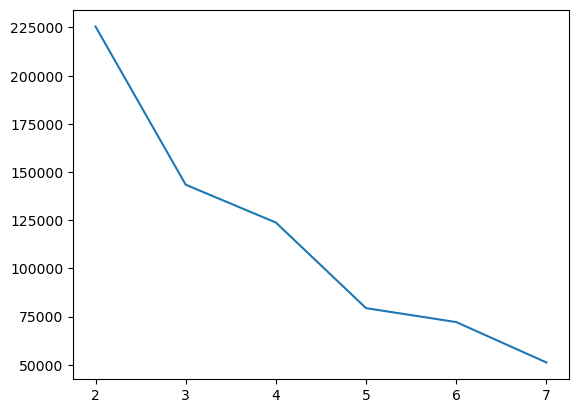

In [14]:
n_clusters = list(range(2,8))
metrics = []
for i in n_clusters:
    kmeans = KMeans(n_clusters=i).fit(x)
    metrics.append(kmeans.inertia_)

sns.lineplot(x = n_clusters,y = metrics)

### 5

Final model

In [12]:
x = df_final.drop(columns=['CustomerID','Genre'])
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(x)
points = kmeans.predict(x)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

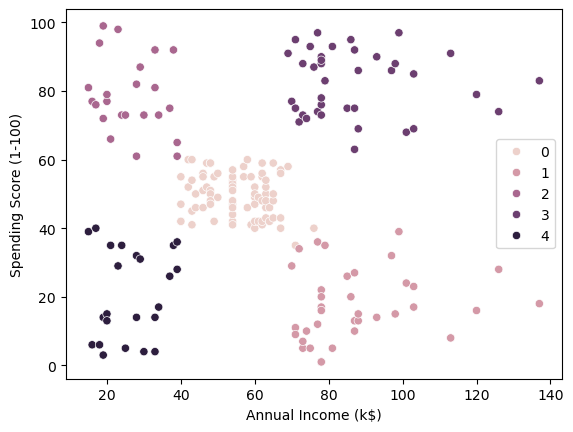

In [15]:
sns.scatterplot(x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'], hue = points) 

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

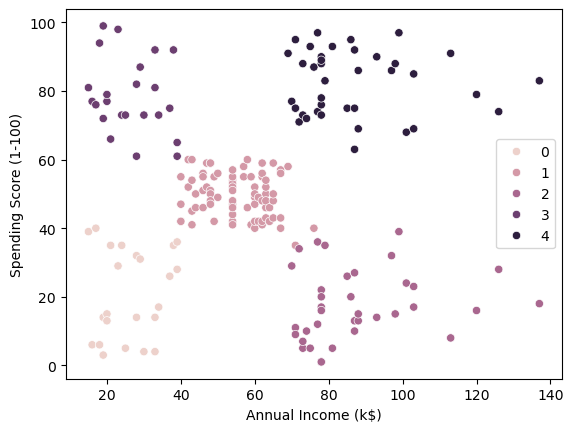

In [19]:
x = df_final.drop(columns=['CustomerID','Genre'])
kmeans = KMeans(n_clusters=5, random_state=130)
kmeans.fit(x)
points = kmeans.predict(x)
sns.scatterplot(x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'], hue = points) 

### 6

When working with data, it’s important not only to focus on the quality of machine learning models but also on interpreting the results and presenting them in a way that is understandable to users and stakeholders.

After building the clustering model, you have divided the customers into groups. Now, it’s important to interpret these groups, which means creating a profile for each group.


In [41]:
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids , columns=x.columns)
centroids_df['Genre'] = centroids_df['Genre_Female'].apply(lambda x: "Female" if x > 0.5 else "Male")
centroids_df.drop(columns=['Genre_Female','Genre_Male'], inplace = True)
centroids_df

,Age,Annual Income (k$),Spending Score (1-100),Genre
0,43.088608,55.291139,49.569620,Female
1,40.666667,87.750000,17.583333,Male
2,25.521739,26.304348,78.565217,Female
3,32.692308,86.538462,82.128205,Female
4,45.217391,26.304348,20.913043,Female


Based on these data, it can be determined that the division results in 5 groups:

0: Middle-aged women with an income of around $55k per year. Average spending level. Balanced expenses.

1: Middle-aged men with an income of around $87k per year. Low income, but high spending. This group of buyers tends to save.

2: Young women with low income but high spending levels. Tendencies toward impulsive buying.

3: Young women with high income and high spending levels. This group tends to prefer premium products and sales.

4: Middle-aged women with low income and low spending levels.